# E4.10 Part 1

In [2]:
# Import Libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# Creating a path
path = r'C:\Users\zwier\anaconda_projects\15-01-2025 Instacart Basket Analysis'

# importing df
instacart_merged = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'instacart_merged.pkl'))

## Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.

In [4]:
# Checking what could be PII
instacart_merged.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,order_frequency_flag,first_name,last_name,gender,state,age,date_joined,num_dependents,family_status,income
0,1107.0,38259.0,2.0,1.0,11.0,7.0,1.0,7.0,0.0,Chocolate Sandwich Cookies,...,Frequent customer,Unknown,Bean,Female,District of Columbia,68.0,2019-06-30,2.0,married,142744.0
1,5319.0,196224.0,65.0,1.0,14.0,1.0,1.0,3.0,1.0,Chocolate Sandwich Cookies,...,Frequent customer,Roger,Casey,Male,New York,48.0,2018-04-29,2.0,married,43906.0
2,7540.0,138499.0,8.0,0.0,14.0,7.0,1.0,4.0,1.0,Chocolate Sandwich Cookies,...,Frequent customer,Andrea,Summers,Female,Massachusetts,31.0,2017-03-11,2.0,married,78505.0
3,9228.0,79603.0,2.0,2.0,10.0,30.0,1.0,2.0,0.0,Chocolate Sandwich Cookies,...,Non-frequent customer,Nicholas,Logan,Male,Tennessee,65.0,2019-10-27,1.0,married,51010.0
4,9273.0,50005.0,1.0,1.0,15.0,0.0,1.0,30.0,0.0,Chocolate Sandwich Cookies,...,Frequent customer,Carl,Mcfarland,Male,New Jersey,75.0,2019-04-09,3.0,married,115468.0


In [5]:
# Checking what could be PII
instacart_merged.dtypes

order_id                         float64
user_id                          float64
order_number                     float64
orders_day_of_week               float64
order_hour_of_day                float64
days_since_prior_order           float64
product_id                       float64
add_to_cart_order                float64
reordered                        float64
product_name                      object
aisle_id                         float64
department_id                    float64
prices                           float64
_merge                          category
busiest_day                       object
Busiest days                      object
busiest_period_of_day             object
max_order                        float64
loyalty_flag                      object
mean_price                       float64
spending_flag                     object
median_frequency                 float64
order_frequency_flag              object
first_name                        object
last_name       

In [6]:
# PII = hiding names
instacart_merged['first_name'] = 'XXXXX'
instacart_merged['last_name'] = 'XXXXX'

## The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.
#### 1. Use the region information in this Wikipedia article to create your column (you only need to create regions, not divisions).
#### 2. Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You can do this by crossing the variable you just created with the spending flag.)

In [8]:
# Creating Region Map
region_map = {
    "Northeast": ["Connecticut", "Maine", "Massachusetts", "New Hampshire", "Rhode Island", "Vermont",
                  "New Jersey", "New York", "Pennsylvania"],
    "Midwest": ["Illinois", "Indiana", "Michigan", "Ohio", "Wisconsin", "Iowa", "Kansas", "Minnesota",
                "Missouri", "Nebraska", "North Dakota", "South Dakota"],
    "South": ["Delaware", "Florida", "Georgia", "Maryland", "North Carolina", "South Carolina", "Virginia",
              "District of Columbia", "West Virginia", "Alabama", "Kentucky", "Mississippi", "Tennessee",
              "Arkansas", "Louisiana", "Oklahoma", "Texas"],
    "West": ["Arizona", "Colorado", "Idaho", "Montana", "Nevada", "New Mexico", "Utah", "Wyoming",
             "Alaska", "California", "Hawaii", "Oregon", "Washington"]
}

# Deffining if
def assign_region(state):
    for region, states in region_map.items():
        if state in states:
            return region
    return "Unknown"  # Just in case od nan

# Adding new column "Region" to DataFrame
instacart_merged["Region"] = instacart_merged["state"].apply(assign_region)


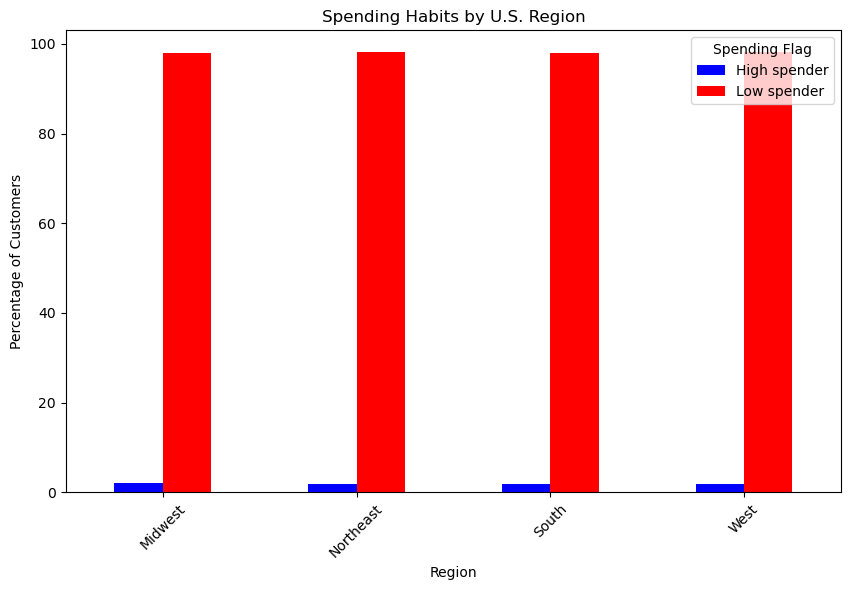

In [9]:
# Creating a Crosstab to Compare Spending
spending_by_region = pd.crosstab(instacart_merged["Region"], instacart_merged["spending_flag"], normalize="index")

# Convert values to percentages
spending_by_region_percent = spending_by_region * 100

# Create a bar chart
spending_by_region_percent.plot(kind='bar', figsize=(10,6), color=['blue', 'red'])

# Add labels and title
plt.title("Spending Habits by U.S. Region")
plt.xlabel("Region")
plt.ylabel("Percentage of Customers")
plt.xticks(rotation=45)  # Rotate region labels
plt.legend(title="Spending Flag", loc="upper right")

# Show the chart
plt.show()

### Key Observations:
- The majority of customers in all regions are **low spenders (~98%)**, while **high spenders make up only a small fraction (~2%)**.
- There is **no significant difference** in spending behavior across regions.
- Regional segmentation does not appear to strongly impact spending habits.


## The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [12]:
# Create an Exclusion Flag using another max_order flag
instacart_merged["exclusion_flag"] = instacart_merged["max_order"] < 5

In [13]:
# Creating a subset = Filter Out Low-Activity Customers
instacart_merged_filtered = instacart_merged[instacart_merged["exclusion_flag"] == False]

#### Checks

In [15]:
# Value check - filtered
instacart_merged_filtered['exclusion_flag'].value_counts(dropna = False)

exclusion_flag
False    31929990
Name: count, dtype: int64

In [16]:
# shape check - filtered
instacart_merged_filtered.shape

(31929990, 34)

In [17]:
# shape check - org
instacart_merged.shape

(32641279, 34)

In [18]:
# Value check - org
instacart_merged['exclusion_flag'].value_counts(dropna = False)

exclusion_flag
False    31929990
True       711289
Name: count, dtype: int64

In [19]:
# Max order value check org
instacart_merged["max_order"].value_counts().sort_index()

max_order
4.0       711289
5.0       773857
6.0       810010
7.0       825922
8.0       816445
          ...   
96.0       59965
97.0       40523
98.0       45019
99.0       44651
100.0    1173687
Name: count, Length: 97, dtype: int64

In [20]:
# Max order value check filtered
instacart_merged_filtered["max_order"].value_counts().sort_index()

max_order
5.0       773857
6.0       810010
7.0       825922
8.0       816445
9.0       822821
          ...   
96.0       59965
97.0       40523
98.0       45019
99.0       44651
100.0    1173687
Name: count, Length: 96, dtype: int64

#### Export

In [22]:
# Export data to csv - 8,7gb
# instacart_merged_filtered.to_csv(os.path.join(path, '02 Data','Prepared Data', 'instacart_merged_filtered.csv'))

In [23]:
# Export data to pkl - 6.6gb
# instacart_merged_filtered.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'instacart_merged_filtered.pkl'))

## The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

#### Define Customer Profiles
##### Young Adult	        = Age < 30, No dependents, Income < 50k
##### Single Professional	= Age 30-45, No dependents, Income 50k-100k, Shops late at night
##### Young Parent	    = Age 25-40, 1+ dependents, Buys baby/kid products (department_id for baby items)
##### Family Shopper	    = Age 30-50, 2+ dependents, Buys household and grocery essentials
##### Senior Citizen	    = Age > 60, Buys healthcare items, Shops early in the morning

#### Creating def & apply to df

In [27]:
# Define conditions for customer profiles
conditions = [
    (instacart_merged_filtered["age"] < 30) & 
    (instacart_merged_filtered["num_dependents"] == 0) & 
    (instacart_merged_filtered["income"] < 50000),

    (instacart_merged_filtered["age"].between(30, 45)) & 
    (instacart_merged_filtered["num_dependents"] == 0) & 
    (instacart_merged_filtered["income"].between(50000, 100000)) & 
    ((instacart_merged_filtered["order_hour_of_day"] >= 20) | 
     (instacart_merged_filtered["order_hour_of_day"] <= 3)),

    (instacart_merged_filtered["age"].between(25, 40)) & 
    (instacart_merged_filtered["num_dependents"] > 0) & 
    (instacart_merged_filtered["department_id"] == "baby"),

    (instacart_merged_filtered["age"].between(30, 50)) & 
    (instacart_merged_filtered["num_dependents"] >= 2),

    (instacart_merged_filtered["age"] > 60) & 
    (instacart_merged_filtered["department_id"] == "health")
]

# Define corresponding profile names
profile_names = [
    "Young Adult",
    "Single Professional",
    "Young Parent",
    "Family Shopper",
    "Senior Citizen"
]

# Assign profiles using np.select() instead of apply()
instacart_merged_filtered["customer_profile"] = np.select(conditions, profile_names, default="Other")

C:\Users\zwier\AppData\Local\Temp\ipykernel_6780\463177513.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  instacart_merged_filtered["customer_profile"] = np.select(conditions, profile_names, default="Other")


#### Analysis

In [29]:
# Analyze Profiles
instacart_merged_filtered["customer_profile"].value_counts()

customer_profile
Other                  26288545
Family Shopper          5267715
Young Adult              246834
Single Professional      126896
Name: count, dtype: int64

## Create an appropriate visualization to show the distribution of profiles.

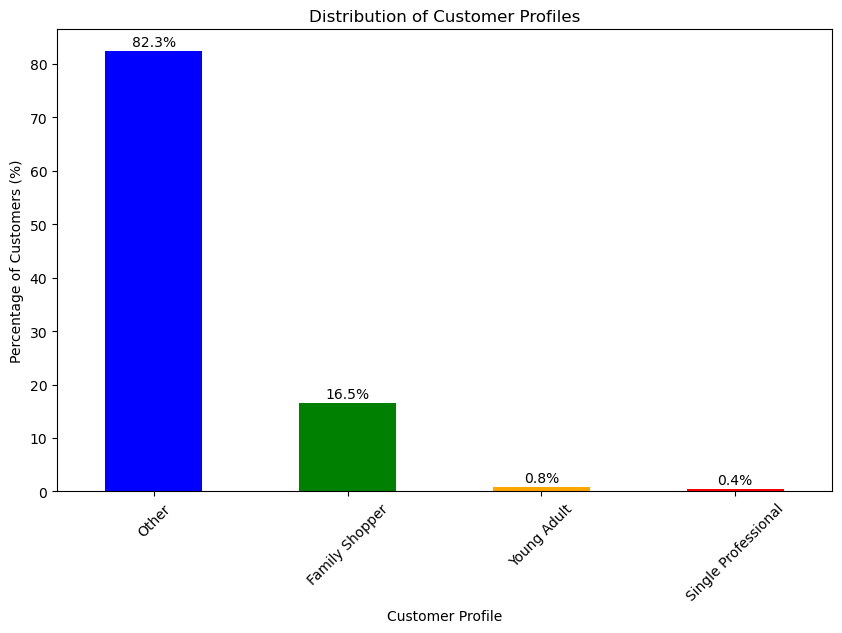

In [31]:
# Count occurrences of each customer profile
profile_counts = instacart_merged_filtered["customer_profile"].value_counts()

# Normalize the counts to percentages
profile_percent = profile_counts / profile_counts.sum() * 100

# Create figure and axis
fig, ax = plt.subplots(figsize=(10,6))

# Plot the bar chart with percentages
profile_percent.plot(kind="bar", color=["blue", "green", "orange", "red", "purple"], ax=ax)

# Labels & title
ax.set_xlabel("Customer Profile")
ax.set_ylabel("Percentage of Customers (%)")
ax.set_title("Distribution of Customer Profiles")
plt.xticks(rotation=45)

# Annotate bars with percentages
for i, value in enumerate(profile_percent):
    ax.text(i, value + 1, f'{value:.1f}%', ha='center', fontsize=10)  # Adjust position and format

# Save the figure properly
save_path = os.path.join(path, "04 Analysis", "Visualizations", "profile_percent.png")
fig.savefig(save_path, dpi=300, bbox_inches="tight")  # Save as high-quality PNG

# Show plot
plt.show()


## Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [33]:
# Aggregate max, mean, and min for usage frequency and expenditure
profile_aggregates = instacart_merged_filtered.groupby("customer_profile").agg(
    max_days_since_prior_order=("days_since_prior_order", "max"),
    mean_days_since_prior_order=("days_since_prior_order", "mean"),
    min_days_since_prior_order=("days_since_prior_order", "min"),
    max_expenditure=("prices", "max"),
    mean_expenditure=("prices", "mean"),
    min_expenditure=("prices", "min")
)

# Round the results for better readability
profile_aggregates = profile_aggregates.round(2)

# Display the results
print(profile_aggregates)

                     max_days_since_prior_order  mean_days_since_prior_order  \
customer_profile                                                               
Family Shopper                             30.0                        10.38   
Other                                      30.0                        10.36   
Single Professional                        30.0                        10.02   
Young Adult                                30.0                        10.58   

                     min_days_since_prior_order  max_expenditure  \
customer_profile                                                   
Family Shopper                              0.0          99999.0   
Other                                       0.0          99999.0   
Single Professional                         0.0          14900.0   
Young Adult                                 0.0             25.0   

                     mean_expenditure  min_expenditure  
customer_profile                                     

## Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

#### Customer Profile vs. Region

Region               Midwest  Northeast  South  Unknown   West
customer_profile                                              
Family Shopper         23.14      17.61  33.61      0.0  25.64
Other                  23.52      17.66  33.26      0.0  25.56
Single Professional    22.14      14.97  34.66      0.0  28.23
Young Adult            23.06      19.22  30.94      0.0  26.78


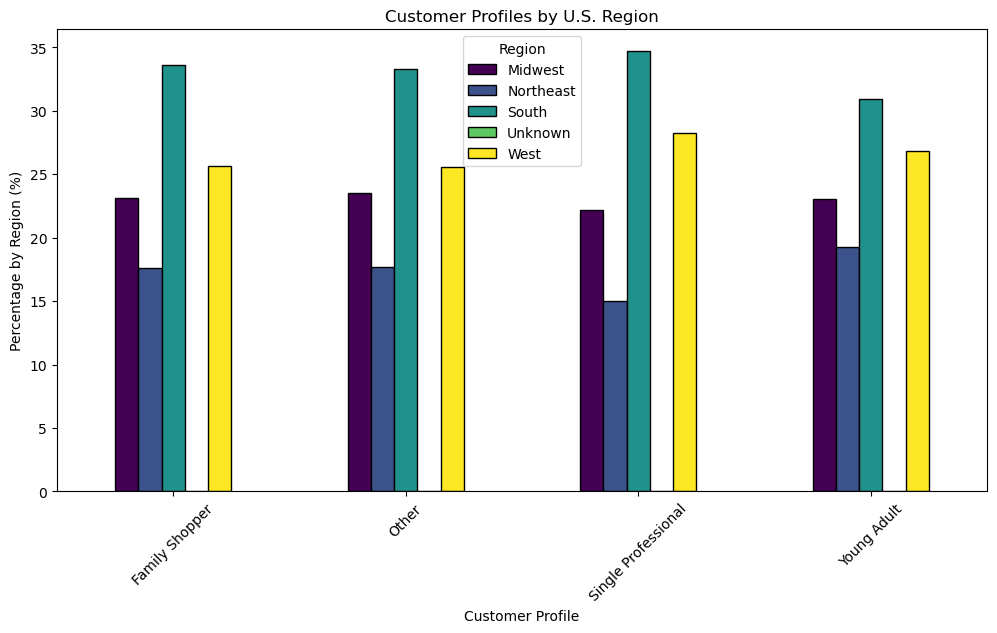

In [70]:
# Define the save path for visualizations
save_dir = os.path.join(path, "04 Analysis", "Visualizations")
os.makedirs(save_dir, exist_ok=True)  # Create directory if missing

# Crosstab for Customer Profile vs. Region
profile_region_ct = pd.crosstab(instacart_merged_filtered["customer_profile"],
                                instacart_merged_filtered["Region"],
                                normalize="index") * 100

# Round values to 2 decimal places
profile_region_ct = profile_region_ct.round(2)

# Display the table
print(profile_region_ct)

# Bar chart visualization
fig, ax = plt.subplots(figsize=(12,6))
profile_region_ct.plot(kind='bar', colormap='viridis', edgecolor='black', ax=ax)

# Add labels and title
ax.set_xlabel("Customer Profile")
ax.set_ylabel("Percentage by Region (%)")
ax.set_title("Customer Profiles by U.S. Region")
plt.xticks(rotation=45)
plt.legend(title="Region")

# Save the chart
save_path_region = os.path.join(save_dir, "customer_profile_vs_region.png")
fig.savefig(save_path_region, dpi=300, bbox_inches="tight")

# Show the plot
plt.show()

#### Customer Profile vs. Department

department_id        1.0   2.0   3.0    4.0   5.0   6.0    7.0   8.0   9.0   \
customer_profile                                                              
Family Shopper       6.81  0.11  3.61  29.43  0.46  0.83   8.18  0.29  2.66   
Other                6.89  0.11  3.63  29.29  0.47  0.83   8.31  0.30  2.67   
Single Professional  6.86  0.12  3.39  31.84  0.27  0.87   6.90  0.21  2.74   
Young Adult          6.44  0.13  3.30  24.43  0.54  0.77  10.57  0.31  2.12   

department_id        10.0  ...  12.0  13.0  14.0  15.0   16.0  17.0  18.0  \
customer_profile           ...                                              
Family Shopper       0.11  ...  2.18  5.77  2.17  3.27  16.74  2.28  1.38   
Other                0.11  ...  2.19  5.78  2.16  3.29  16.68  2.27  1.30   
Single Professional  0.11  ...  2.19  5.93  1.99  3.17  17.17  2.09  1.77   
Young Adult          0.12  ...  1.25  5.09  2.58  2.59  15.63  2.67  1.28   

department_id         19.0  20.0  21.0  
customer_profile     

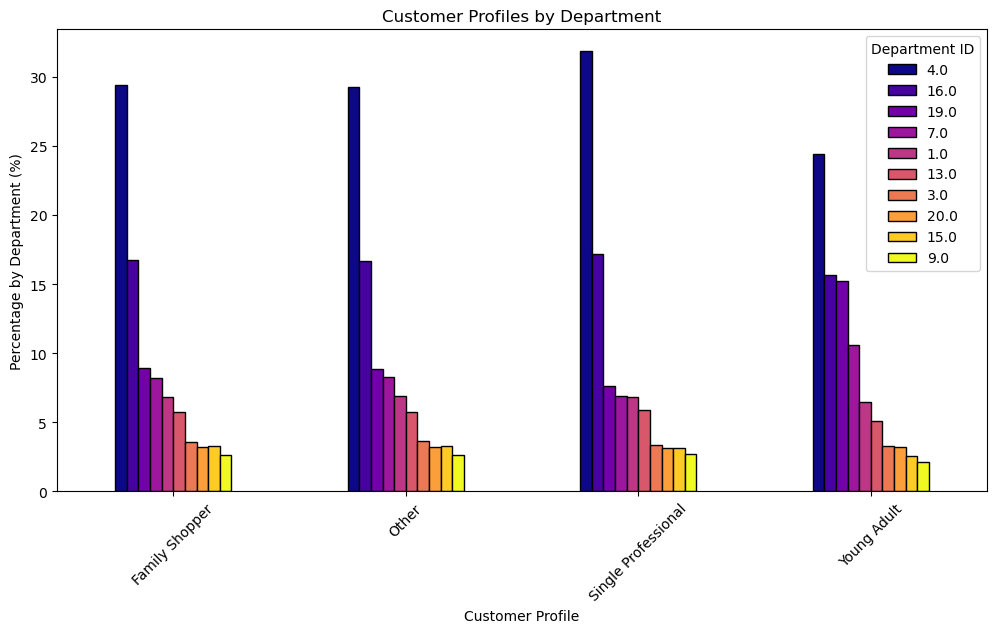

In [68]:
# Crosstab for Customer Profile vs. Department
profile_department_ct = pd.crosstab(instacart_merged_filtered["customer_profile"],
                                    instacart_merged_filtered["department_id"],
                                    normalize="index") * 100

# Round values to 2 decimal places
profile_department_ct = profile_department_ct.round(2)

# Display the table
print(profile_department_ct)

# Display the table
print(profile_department_ct)

# Get the top 10 departments by mean customer distribution
top_departments = profile_department_ct.mean().sort_values(ascending=False).index[:10]

# Bar chart visualization
fig, ax = plt.subplots(figsize=(12,6))
profile_department_ct[top_departments].plot(kind='bar', colormap='plasma', edgecolor='black', ax=ax)

# Add labels and title
ax.set_xlabel("Customer Profile")
ax.set_ylabel("Percentage by Department (%)")
ax.set_title("Customer Profiles by Department")
plt.xticks(rotation=45)
plt.legend(title="Department ID")

# Save the chart
save_path_department = os.path.join(save_dir, "customer_profile_vs_department.png")
fig.savefig(save_path_department, dpi=300, bbox_inches="tight")

# Show the plot
plt.show()

## Produce suitable charts to illustrate your results and export them in your project folder.

#### Done

## Tidy up your script, export your final data set, and save your notebook.

In [77]:
# Export data to pkl - 6.6gb
# instacart_merged_filtered.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'instacart_merged_filtered.pkl'))